In [2]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

## Exercise 12_2

### Convolutional Neural Network

We have so far considered each MNIST data sample as a $(28\times 28)$-long 1d vector. On the other hand, we do know that in every one of the hand-written digits there are *local* spatial correlations between the pixels, but also *translational invariance*, which we would like to take advantage of to improve the accuracy of our classification model using a Convolutional Neural Network

First, we need to acquire data in the shape of $(28\times 28)$ matrices.

In [25]:
from keras.datasets import mnist
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# (X are data images, Y are labels)

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# cast floats to single precision, and rescale to interval [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000,)

60000 train samples
10000 test samples


#### Create DNN architecture
We change the architecture of the DNN using convolutional layers: `Conv2D`, `MaxPooling2D`, `Dropout`.

As the final layers need to be flat, we will use `Flatten`, a standard `Dense` layer and `soft-max` in the end.

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_CNN():
    # ----- Instantiate model -----
    model = Sequential()
    
    # ----- Layers -----
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    model.add(Conv2D(64, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    model.add(Dropout(0.5))
    model.add(MaxPooling2D(pool_size = (4, 4)))
    model.add(Flatten())
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # move towards a standard flat layer in the final part of your DNN,
    # soft-max layer with num_classes=10 possible outputs
    
    # ----- Compile the model ------
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['acc'])
    return model

In [15]:
# training parameters
batch_size = 32
epochs = 10

# create the deep conv net
model_CNN=create_CNN()

/home/davide/anaconda3/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


We thus compile and evaluate the model.

In [16]:
# train CNN
history= model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10


2024-11-04 16:24:17.693587: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - acc: 0.7057 - loss: 0.8940 - val_acc: 0.9676 - val_loss: 0.2075
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - acc: 0.9631 - loss: 0.1213 - val_acc: 0.9793 - val_loss: 0.1331
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - acc: 0.9731 - loss: 0.0860 - val_acc: 0.9831 - val_loss: 0.1038
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - acc: 0.9779 - loss: 0.0714 - val_acc: 0.9838 - val_loss: 0.0896
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - acc: 0.9811 - loss: 0.0622 - val_acc: 0.9847 - val_loss: 0.0815
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - acc: 0.9829 - loss: 0.0561 - val_acc: 0.9863 - val_loss: 0.0765
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - acc: 0.9847 - loss: 0.0513 - val_acc: 0.9868 - val_loss: 0.0685
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - acc: 0.9858 - loss: 0.0469 - val_acc: 0.9863 - val_loss: 0.0657
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━

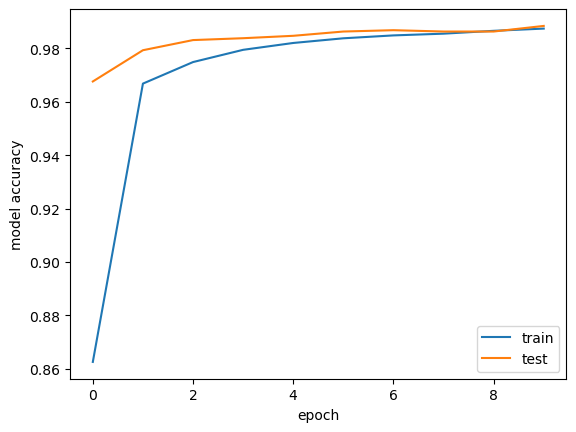

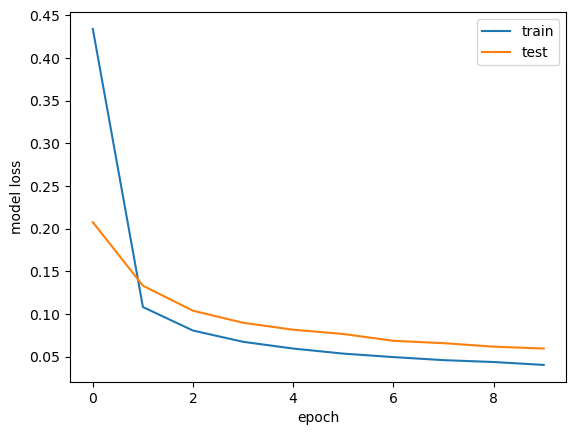

In [17]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
(10000, 28, 28, 1)


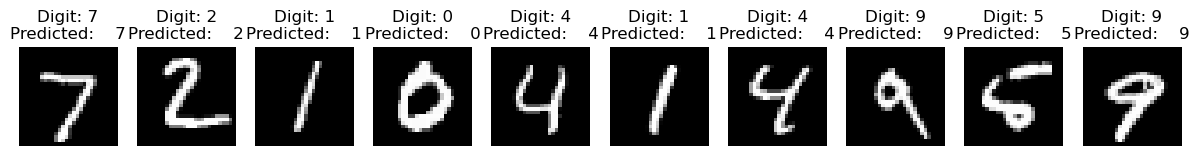

In [24]:
predictions = model_CNN.predict(X_test)
print(X_test.shape)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15))
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

# Exercise 12.3

In this section we use the newly trained CNN to recognize 'handwritten' (via GIMP) digits.

In [19]:
from PIL import Image

# read first file to assess x and y dimensions
digit_filename = "./digits/digit_0.png"
digit_in = Image.open(digit_filename).convert('L')
ydim, xdim = digit_in.size
print("Image size: "+str(xdim)+"x"+str(ydim))

#initialize 'handwritten' vector
target_shape=(num_classes, xdim, ydim, 1)
handwritten=np.zeros(shape=target_shape)
print(handwritten.shape)

for digit in range(10):
    digit_filename = "./digits/digit_" + str(digit) + ".png"
    digit_in = Image.open(digit_filename).convert('L')
    
    pix=digit_in.load();
    for j in range(ydim):
        for i in range(xdim):
            handwritten[digit ,i,j, 0]=pix[j,i]  # load all data onto 'handwritten' vector

Image size: 28x28
(10, 28, 28, 1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


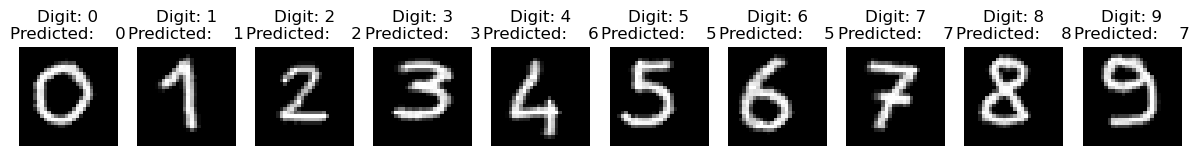

In [20]:
# create predictions
handw_pred = model_CNN.predict(handwritten)

handwritten = handwritten.reshape(handwritten.shape[0], xdim, ydim, 1) # useless? Check

plt.figure(figsize=(15, 15))
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(handwritten[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(i, np.argmax(handw_pred[i])))    
    plt.axis('off') 
plt.show()

The model does not succesfully recognize all 10 input digits. This is most likely due to substantial differences in handwriting from the MNIST dataset, which is composed of handwritten digits by people from the USA. In particular, the digits 1, 4 and 9 significantly differ in style.